In [1]:
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import random

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = "/content/drive/MyDrive/Split_dataset"

train_dir = base_path + "/train"
val_dir = base_path + "/val"
test_dir = base_path + "/test"

In [4]:
img_size = (256, 256)
batch_size = 40

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary',
    shuffle=True,
    seed=123

)

val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    val_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary',
    shuffle=False
)

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=img_size,
    batch_size=batch_size,
    label_mode='binary',
    shuffle=False
)

Found 2785 files belonging to 2 classes.
Found 597 files belonging to 2 classes.
Found 598 files belonging to 2 classes.


In [5]:
AUTOTUNE = tf.data.AUTOTUNE

train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.prefetch(buffer_size=AUTOTUNE)

In [15]:
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1),
])

In [16]:
model = models.Sequential([
    layers.Input(shape=(256, 256, 3)),
    #data_augmentation,
    layers.Rescaling(1./255),
    layers.Conv2D(32, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D(),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(1, activation='sigmoid')
])


In [17]:
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_ds,
                    validation_data=val_ds,
                    epochs=50)

Epoch 1/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 29s 299ms/step - accuracy: 0.6573 - loss: 0.6342 - val_accuracy: 0.7705 - val_loss: 0.4947
Epoch 2/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 210ms/step - accuracy: 0.7777 - loss: 0.4872 - val_accuracy: 0.7487 - val_loss: 0.4639
Epoch 3/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 201ms/step - accuracy: 0.7828 - loss: 0.4362 - val_accuracy: 0.8157 - val_loss: 0.4134
Epoch 4/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 204ms/step - accuracy: 0.8266 - loss: 0.3954 - val_accuracy: 0.8007 - val_loss: 0.4147
Epoch 5/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 21s 211ms/step - accuracy: 0.8329 - loss: 0.3656 - val_accuracy: 0.8208 - val_loss: 0.4006
Epoch 6/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 15s 209ms/step - accuracy: 0.8426 - loss: 0.3336 - val_accuracy: 0.8358 - val_loss: 0.3678
Epoch 7/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 17s 239ms/step - accuracy: 0.8801 - loss: 0.2895 - val_accuracy: 0.8643 - val_loss: 0.3389
Epoch 8/50
70/70 ━━━━━━━━━━━━━━━━━━━━ 14s 204ms/step - accuracy: 0.8910 - loss: 0.2460 - val_accu

In [18]:
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test accuracy: {test_acc}")
print(f"Test loss: {test_loss}")

19/19 ━━━━━━━━━━━━━━━━━━━━ 4s 146ms/step - accuracy: 0.9008 - loss: 0.5533
Test accuracy: 0.9230769276618958
Test loss: 0.4287225306034088


In [19]:
y_true = []
y_pred = []

for images, labels in test_ds:
    predictions = model.predict(images)

    predicted_classes = (predictions > 0.5).astype(int).flatten()

    y_true.extend(labels.numpy().astype(int))
    y_pred.extend(predicted_classes)

y_true = np.array(y_true)
y_pred = np.array(y_pred)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 138ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 164ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 157ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 156ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 117ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 92ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 376ms/step


Found 598 files belonging to 2 classes.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 114ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 95ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 110ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 97ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 103ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 61ms/step


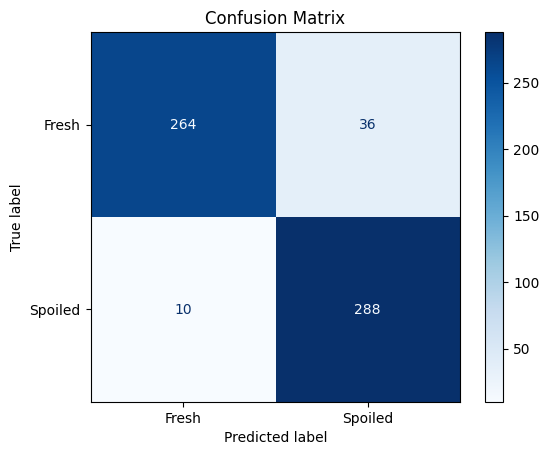

In [20]:
test_dir = "/content/drive/MyDrive/Split_dataset/test"

test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    test_dir,
    image_size=(256, 256),
    batch_size=32,
    label_mode='binary',
    shuffle=False
)


class_names = test_ds.class_names


test_ds = test_ds.prefetch(buffer_size=tf.data.AUTOTUNE)


y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)

    pred_classes = (preds > 0.5).astype(int).flatten()
    y_true.extend(labels.numpy().astype(int))
    y_pred.extend(pred_classes)


from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

class_names = ['Fresh', 'Spoiled']
cm = confusion_matrix(y_true, y_pred)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 738ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


<ipython-input-21-082f02a93e21>:20: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  true_index = int(label)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


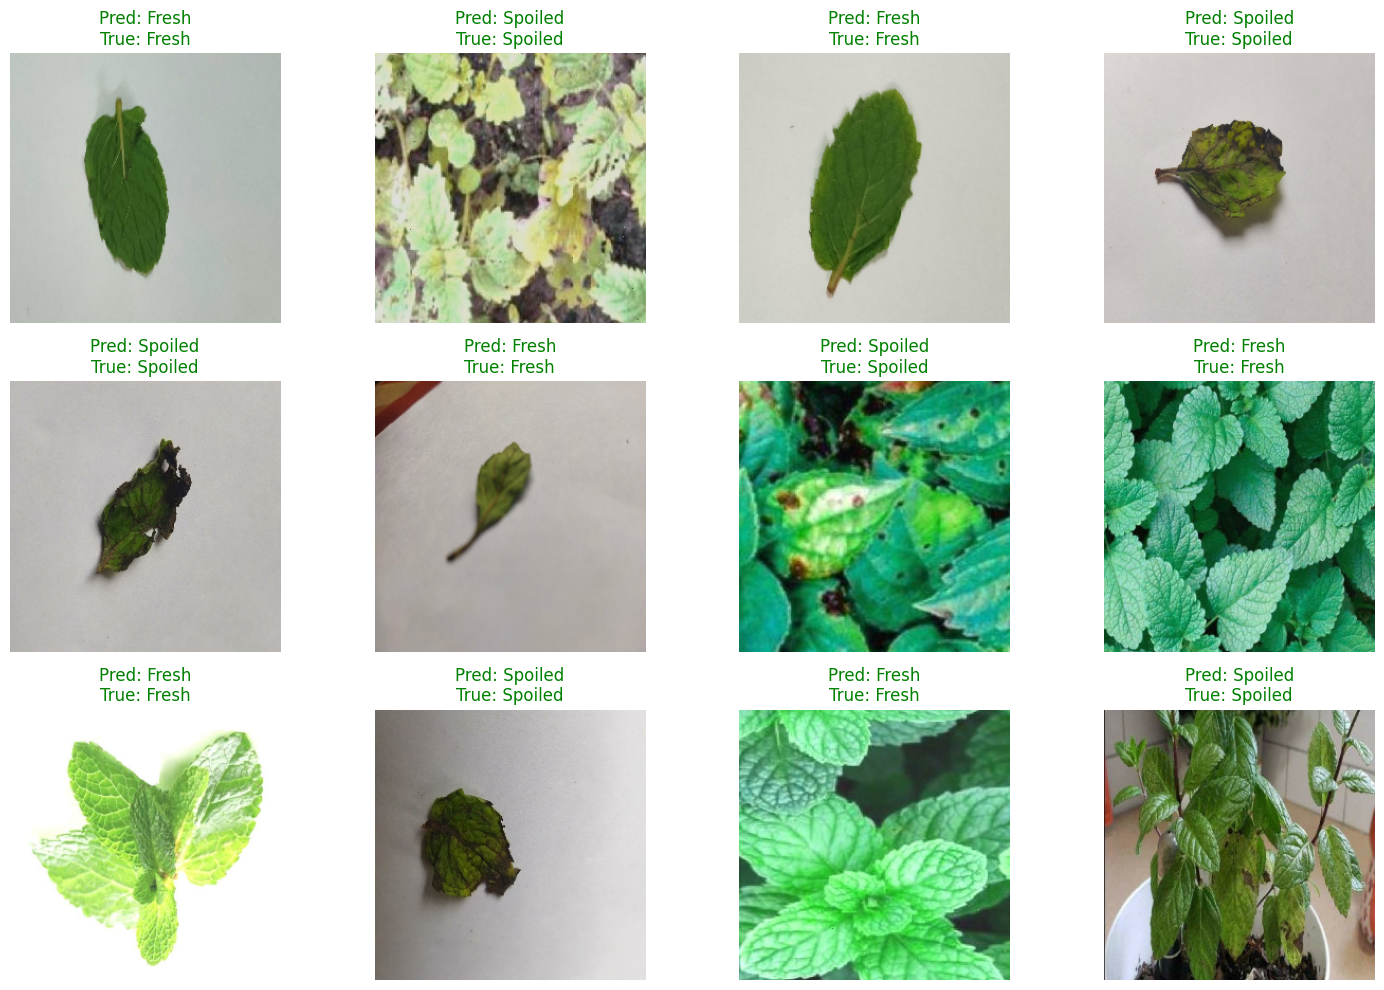

In [21]:
import random
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np

N = 12

# Make sure test_ds is batched and prefetched correctly
image_label_list = list(test_ds.unbatch().as_numpy_iterator())
random_samples = random.sample(image_label_list, N)

plt.figure(figsize=(15, 10))

for i, (image, label) in enumerate(random_samples):
    image_tensor = tf.expand_dims(image, axis=0)
    prediction = model.predict(image_tensor)[0][0]

    predicted_index = int(prediction > 0.5)

    true_index = int(label)

    plt.subplot(3, 4, i + 1)
    plt.imshow(image.astype("uint8"))

    pred_class = class_names[predicted_index]
    true_class = class_names[true_index]
    color = "green" if predicted_index == true_index else "red"

    plt.title(f"Pred: {pred_class}\nTrue: {true_class}", color=color)
    plt.axis("off")

plt.tight_layout()
plt.show()


In [24]:
import matplotlib.pyplot as plt
import tensorflow as tf

plt.figure(figsize=(15, 15))

for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))

        # Predict returns a probability scalar (batch_size=1)
        prediction = model.predict(tf.expand_dims(images[i], axis=0))[0][0]

        predicted_index = int(prediction > 0.5)
        confidence = prediction if predicted_index == 1 else 1 - prediction

        predicted_class = class_names[predicted_index]
        actual_class = class_names[int(labels[i])]  # labels are scalar 0 or 1

        plt.title(f"Predicted: {predicted_class}\nConfidence: {confidence:.2f}\nActual: {actual_class}")
        plt.axis("off")

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

In [32]:
model.save('/content/drive/MyDrive/model_acc99_5_50.h5')

ValueError: Invalid filepath extension for saving. Please add either a `.keras` extension for the native Keras format (recommended) or a `.h5` extension. Use `model.export(filepath)` if you want to export a SavedModel for use with TFLite/TFServing/etc. Received: filepath=/content/drive/MyDrive/model_acc99_5_50.

In [26]:
!pip install tensorflowjs

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.0/53.0 kB 5.0 MB/s eta 0:00:00
  Attempting uninstall: packaging
    Found existing installation: packaging 24.2
    Uninstalling packaging-24.2:
      Successfully uninstalled packaging-24.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
db-dtypes 1.4.3 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.
google-cloud-bigquery 3.32.0 requires packaging>=24.2.0, but you have packaging 23.2 which is incompatible.


In [36]:
import tensorflow as tf

model = tf.keras.models.load_model('/content/drive/MyDrive/model_acc99_5_50.h5')


In [39]:
model.export('/content/drive/MyDrive/my_model_saved')

Saved artifact at '/content/drive/MyDrive/my_model_saved'. The following endpoints are available:

* Endpoint 'serve'
  args_0 (POSITIONAL_ONLY): TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name='input_layer_3')
Output Type:
  TensorSpec(shape=(None, 1), dtype=tf.float32, name=None)
Captures:
  140273888694672: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273888693904: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273888698128: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273888702544: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273888695248: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273835681616: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273835683536: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273835686224: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273835683152: TensorSpec(shape=(), dtype=tf.resource, name=None)
  140273835685264: TensorSpec(shape=(), dtype=tf.resource, name=

In [40]:
!tensorflowjs_converter --input_format=tf_saved_model --output_format=tfjs_graph_model /content/drive/MyDrive/my_model_saved /content/drive/MyDrive/my_model_tfjs


2025-05-23 03:54:54.454115: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1747972494.473411   30076 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1747972494.482015   30076 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
🌲 Try https://ydf.readthedocs.io, the successor of TensorFlow Decision Forests with more features and faster training!
2025-05-23 03:54:58.562630: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:47] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
I0000 00:00:1747972498.562807   30076 gpu_device.cc:2022] Created device /job:localhost/replica:0/task

In [31]:
model = tf.keras.models.load_model("/content/drive/MyDrive/model_acc99_5_50.h5")